<img src="http://www.ociv.usm.cl/imag/logos/UTFSM_logo.gif" style="float:right;height:100px">
<img src="https://www.inf.utfsm.cl/images/sitio/di.png" style="float:left;height:100px">
<center>
    <h1> INF393 Máquinas de Aprendizaje </h1>
    <h1> Tarea N°2: Métodos para Clasificación </h1>
</center>
<br>
<center>24 de Noviembre de 2017</center>

<table border="0" style="width:500px">
<tr> 
<td style="text-align:center">**Javier Levio S.**</td><td style="text-align:center">**Carlos Molina Y.**</td>
</tr>
<tr>
<td style="text-align:center">201273598-k</td><td style="text-align:center">201273507-6</td>
</tr>
<tr>
<td style="text-align:center">`javier.levio.12@sansano.usm.cl`</td><td style="text-align:center">`carlos.molina.12@sansano.usm.cl`</td>
</tr>
</table>

In [16]:
# Para manipular data sets
import pandas as pd
# Principalmente para manipular matrices
import numpy as np
# Para escalar los datos
from sklearn.preprocessing import StandardScaler
# Para utilizar la regresión lineal estándar
import sklearn.linear_model as lm
# Para graficar
import pylab 
# Para graficar
import scipy.stats as stats
# Para realizar validación cruzada
from sklearn.model_selection import KFold
# Para aplicar regularización con el método de Ridge
from sklearn.linear_model import Ridge
# Para gráficar
import matplotlib.pylab as plt
%matplotlib inline 
# Para aplicar regularización el método de Lasso
from sklearn.linear_model import Lasso
from sklearn.utils import check_random_state
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM #SVC is for classification


In [17]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02
    # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()


# 1 A

In [18]:
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

In [19]:
X = np.concatenate((datos1, datos2), axis=0)
n = 20
#ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y =  np.concatenate((y1,y2),axis=0)

Cantidad de Elementos conjunto X:  1000
Cantidad de Elementos conjunto y:  1000


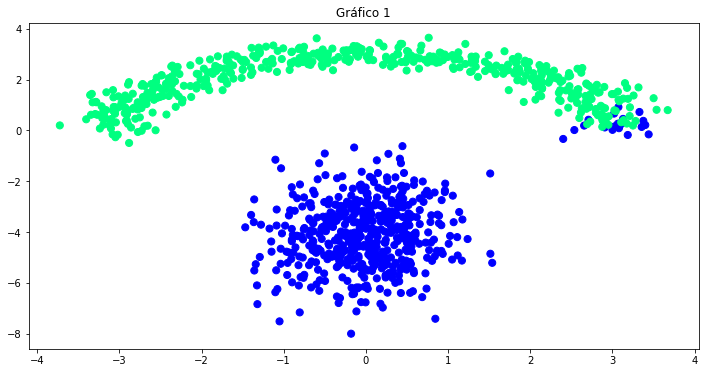

In [20]:
print ("Cantidad de Elementos conjunto X: ",len(X))
print ("Cantidad de Elementos conjunto y: ",len(y))
fig = plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=plt.cm.winter)
plt.title("Gráfico 1")
plt.show()

# 1 B

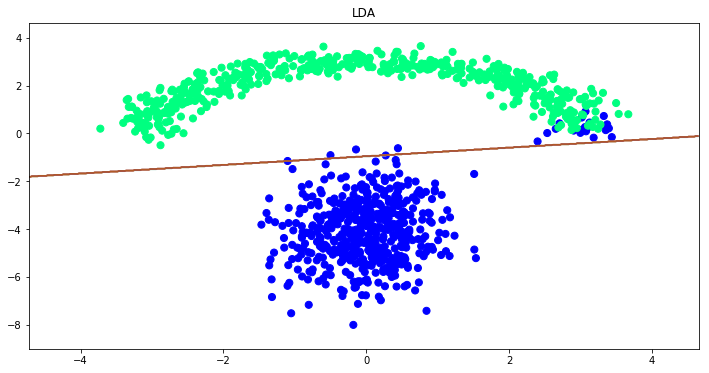

In [21]:
model = LDA()
model.fit(X,y)
yPredictLDA=model.predict(X)
visualize_border(model,X,y,"LDA")

Se observa una separación lineal entre los datos con una leve inclinación a la derecha, debido al shift de datos. 

# 1 C

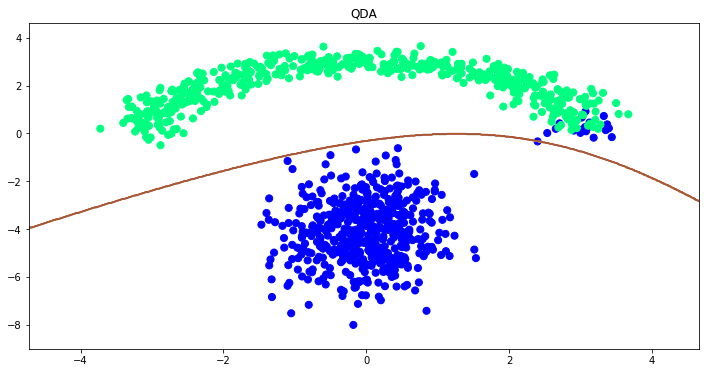

In [22]:
model = QDA()
model.fit(X,y)
yPredictQDA=model.predict(X)
visualize_border(model,X,y,"QDA")

Se observa una curva mucho más ajustada que LDA, separando mejor los datos.
Ambos asumen una distribución gaussiana.

# 1 D

In [23]:
from sklearn.metrics import accuracy_score
print("Miss Classification Loss LDA: %f"%(1-accuracy_score(y, yPredictLDA)))
print("Miss Classification Loss QDA: %f"%(1-accuracy_score(y, yPredictQDA)))

Miss Classification Loss LDA: 0.024000
Miss Classification Loss QDA: 0.019000


QDA tiene un error de clasificación menor, ya que se ajusta más a los datos. Además disminuye el overfitting, dejando una frontera más flexible entre los conjuntos.

# 1 E

In [24]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)
def train_model(param):
    model=LR()
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model
p_min = 0.001
p_max = 2
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

El parámetro C, corresponde al inverso del parámetro de regularización. Entre menor es el valor de C, permite más clasificaciones erroneas y viceversa.
En este caso, al aumentar C, se observa que la linea se ajusta más a los datos del shift, justamente porque busca la recta que separa los conjuntos con la menor cantidad de clasificaciones erroneas.

# 1 F

In [25]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model
p_min = 0.001
p_max = 2
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

Al igual que para el item anterior, el parámetro C, corresponde al inverso del parámetro de regularización. Entre menor es el valor de C, permite más clasificaciones erroneas y viceversa.
En este caso, al aumentar C, se observa que la linea se ajusta más a los datos del shift, justamente porque busca la recta que separa los conjuntos con la menor cantidad de clasificaciones erroneas.

# 1 G

In [26]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf')
    model.fit(X,y)
    return model
p_min = 0.1
p_max = 100
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

In [27]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly')
    model.fit(X,y)
    return model
p_min = 1
p_max = 100
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

Al igual que en los items anteriores, al aumentar C, la curva se ajusta más a los datos, generando más overfitting.

# 1 H

In [28]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model
p_min = 1
p_max = 100
interactive(visualize_border_interactive,param=(p_min,p_max))


A Jupyter Widget

Al aumentar la profundidad máxima del árbol, se generan particiones más específicas, generando mucho más overfitting que con los modelos anteriores.


# 1 I

In [29]:
from sklearn.neighbors import KNeighborsClassifier
def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model
p_min = 1
p_max = 100
interactive(visualize_border_interactive,param=(p_min,p_max))


A Jupyter Widget

Cuando el parámetro K es igual a 1, se genera una separación perfecta entre los conjuntos. Al ir aumentando dicho parámetro, se generan separaciones más flexibles con menos overfitting.

# 2 A

In [30]:
from scipy.io import wavfile
def clean_filename(fname,string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name

SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')
df.shape
df.label.value_counts()

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64

Existen 176 registros.

# 2 B

In [31]:
def padd_zeros(array, length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux

new_df = pd.DataFrame({'file_name' : df['fname'].apply(clean_filename, string = 'Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path = './heartbeat-sounds/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series'] = new_df['time_series'].apply(padd_zeros, length = max(new_df['len_series']))
new_df.head()
new_df.shape

(176, 3)

Se realiza padding para que el data set corresponda a una matriz.
En el procedimiento se llena el dataframe con los nombres de los archivos sin etiqueta que se encuentran en una carpeta adjunta. Luego, los archivos de audio de codifican y guardan en el mismo. Para finalmente realizarles el padding.

# 2 C

In [32]:
new_labels=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,1,1,1,
1,1,1,1,1,2,1,1,1,2,2,2,1,1,2,1,2,2,1,2,2,2,2,2,2,
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,
1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,2,2,1,1,1,1,1,2,1,0,
2,2,1,1,1,1,1,0,1,0,1,1,1,2,1,0,1,1,1,1,1,2,0,0,0,
0,0,0,0,1,0,0,0,0,0,0,1,0,2,1,2,2,2,2,2,2,2,2,2,2,2]

labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]

El mal etiquetado de un solo dato, no debería afectar de sobremanera en el rendimiento de un algoritmo de clasificación, es más podría contribuir a la disminuir el overfitting. Claramente, una cantidad considerable de información errónea, sí terminará por afectar el procedimiento.

# 2 D

In [89]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)
#new_df.head()

Index(['target'], dtype='object')


# 2 E

In [34]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

(176, 396900)

Las dimensiones de la matriz pueden generar problemas de cómputo. Por lo que sería recomendable aplicar tratamientos de reducción de dimensionalidad.

# 2 F

In [35]:
X_fourier = np.abs(np.fft.fft(X))

# 2 G

In [36]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

Beneficia al reducir la dimensionalidad de la matriz. Realizando una pequeña investigación acerca del método utilizado, se encuentra que se considera la periodicidad de la transformada de fourier. Dado esto, la representatividad está garantizada.

# 2 H

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, 
                                                    random_state=42)
print(np.unique(y_train))
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

[0 1 2]
{0: 48, 1: 40, 2: 44}


Existen 3 clases. 48 de la primera, 40 de la segunda y 44 de la tercera.

# 2 I

In [38]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
print("Dimensiones X_train: (", X_train.shape[0], ",", X_train.shape[1], ")")
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

Dimensiones X_train: ( 132 , 100000 )


# 2 J

Dimensiones X_std_train: ( 132 , 100000 )
Dimensiones X_pca_train: ( 132 , 2 )
[0 2 0 0 1 0 1 2 1 1 2 2 2 2 0 0 1 1 2 1 2 0 1 1 1 1 1 1 0 2 1 2 0 2 2 2 0
 0 1 0 1 2 0 0 0 2 2 2 2 0 1 2 0 0 1 2 0 2 0 0 2 2 0 2 1 2 1 2 2 0 0 0 1 1
 2 0 0 0 2 2 2 1 2 1 0 1 2 0 1 1 1 1 2 0 2 0 1 1 0 2 1 2 0 0 1 2 2 0 2 1 2
 0 0 0 1 1 1 0 0 1 2 1 2 0 0 0 1 0 0 2 0 0]


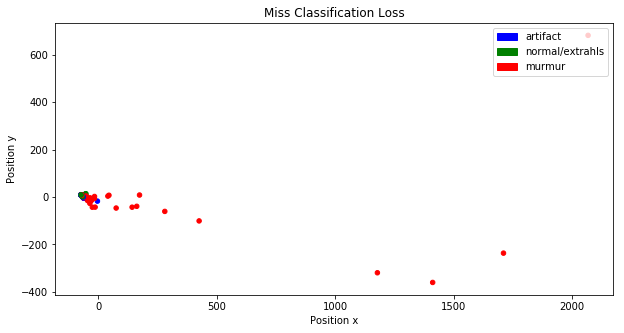

In [102]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
print("Dimensiones X_std_train: (", X_train.shape[0], ",", X_train.shape[1], ")")
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
print("Dimensiones X_pca_train: (", X_pca_train.shape[0], ",", X_pca_train.shape[1], ")")
X_pca_test = pca_model.transform(X_test)

xlist=[]
ylist=[]
for (x,y) in X_pca_train:
    xlist.append(x)
    ylist.append(y)
plt.figure();
dfplot=pd.DataFrame(columns=["Position x", "Position y", "Label"])
dfplot["Position x"] = xlist
dfplot["Position y"] = ylist
dfplot["Label"] = y_train
colors = {0:'red', 1:'blue', 2:'green'}
print(y_train)
dfplot.plot(kind='scatter',x='Position x',y='Position y',
            title="Miss Classification Loss",figsize=(10,5),
            c=dfplot['Label'].apply(lambda x: colors[x]))

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

art = mpatches.Patch(color='blue', label='artifact')
nor = mpatches.Patch(color='green', label='normal/extrahls')
mur = mpatches.Patch(color='red', label='murmur')
plt.legend(handles=[art,nor,mur], loc=1)
plt.show()

# 2 K

In [40]:
from matplotlib.ticker import FormatStrFormatter

parameters = [0.0001,0.01,0.1,1,10,100,1000]

lossLR = []
for param in parameters:
    model = LR()
    model.set_params(C=param, penalty='l2')
    model.fit(X_pca_train,y_train)
    y_hat = model.predict(X_pca_test)
    #y_error = mse(y_test, y_hat)
    loss = (1-accuracy_score(y_test, y_hat))
    lossLR.append(loss)

minLR = min(lossLR)
CLR = parameters[lossLR.index(minLR)]
print("Loss mínimo de:", minLR, "con C =", CLR)

Loss mínimo de: 0.431818181818 con C = 0.0001


Loss mínimo de: 0.409090909091 con C = 1000


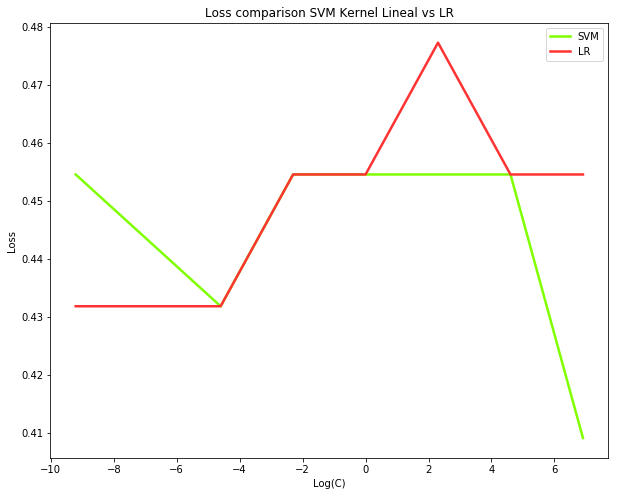

In [41]:
lossSVM = []
for param in parameters:
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X_pca_train,y_train)
    y_hat = model.predict(X_pca_test)
    #y_error = mse(y_test, y_hat)
    loss = (1-accuracy_score(y_test, y_hat))
    lossSVM.append(loss)

minSVM = min(lossSVM)
CSVM = parameters[lossSVM.index(minSVM)]
print("Loss mínimo de:", minSVM, "con C =", CSVM)
    
plt.figure(figsize=(10, 8))
plt.xlabel("Log(C)")
plt.ylabel("Loss")
plt.title("Loss comparison SVM Kernel Lineal vs LR")
plt.plot(np.log(parameters), lossSVM, lw=2.5, color=(0.5,1,0), label='SVM')
plt.plot(np.log(parameters), lossLR, lw=2.5, color=(1,0.2,0.2), label='LR')
plt.legend()
plt.show()

La cantidad de clasificaciones erroneas varia de manera bastante irregular.

# 2 L

Loss mínimo de: 0.386363636364 con profundidad = 3


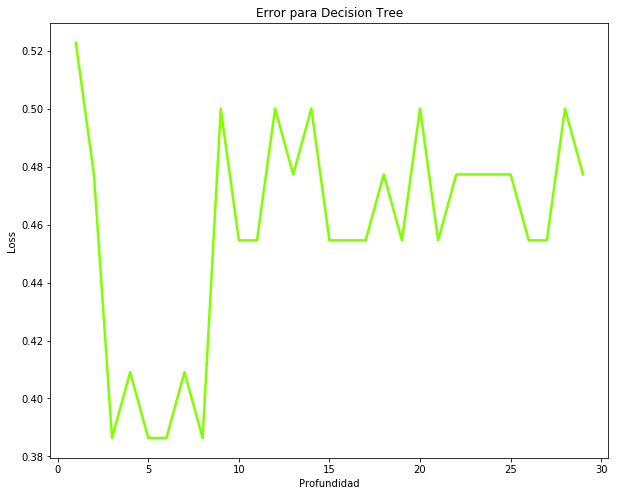

In [42]:
from sklearn import tree

Depths = range(1,30)

lossCT = []

for D in Depths:
    model = tree.DecisionTreeClassifier(max_depth=D, )
    model = model.fit(X_pca_train,y_train)
    y_hat = model.predict(X_pca_test)
    loss  = (1-accuracy_score(y_test, y_hat))
    lossCT.append(loss)

minCT = min(lossCT)
DCT = Depths[lossCT.index(minCT)]
print("Loss mínimo de:", minCT, "con profundidad =", DCT)    
    
plt.figure(figsize=(10, 8))
plt.xlabel("Profundidad")
plt.ylabel("Loss")
plt.title("Error para Decision Tree")
plt.plot(Depths, lossCT, lw=2.5, color=(0.5,1,0))
plt.show()

En este caso se nota una tendencia a la subida a medida que la profundidad máxima del árbol aumenta. Esto porque se genera un overfitting excesivo respecto al conjunto de entrenamiento.

# 2 M

In [43]:
pca_model = PCA()
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)

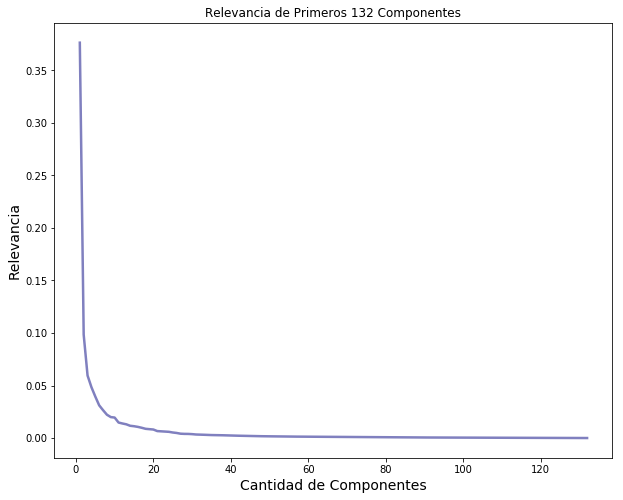

In [44]:
sing_val = pca_model.singular_values_
total = sum(sing_val)

ratios = [sv/total for sv in sing_val]

plt.figure(figsize=(10, 8))
plt.xlabel("Cantidad de Componentes", fontsize=14)
plt.ylabel("Relevancia", fontsize=14)
plt.title("Relevancia de Primeros "+str(len(sing_val))+" Componentes")
plt.plot(range(1,len(sing_val)+1), ratios, lw=2.5, color=(0.5,0.5,0.75))
plt.show()

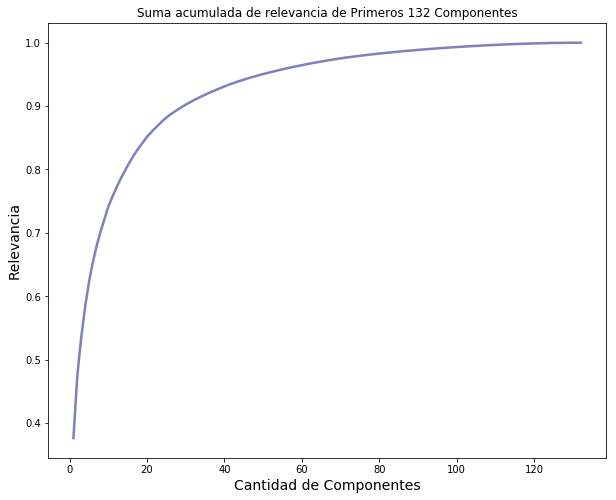

In [45]:
acum_values = [sum(ratios[0:i]) for i in range(1,len(ratios)+1)]

plt.figure(figsize=(10, 8))
plt.xlabel("Cantidad de Componentes", fontsize=14)
plt.ylabel("Relevancia", fontsize=14)
plt.title("Suma acumulada de relevancia de Primeros "+str(len(sing_val))+" Componentes")
plt.plot(range(1,len(sing_val)+1), acum_values, lw=2.5, color=(0.5,0.5,0.75))
plt.show()

In [46]:
TOL = 0.01 # 1%
d=0
for ratio in ratios:
    if ratio < TOL:
        break
    d+=1
print("d = ", d)
print("S = ", acum_values[d-1])

d =  16
S =  0.816531512026


<table border="1">
<tr>
<td colspan="3"></td>
<td colspan="6" style="text-align:center">Minimal Loss</td>
</tr>
<tr>
<td colspan="3"></td>
<td colspan="2" style="text-align:center">LR</td>
<td colspan="2" style="text-align:center">SVM</td>
<td colspan="2" style="text-align:center">CT</td>
</tr>
<tr>
<td colspan="1" style="text-align:center">d</td>
<td colspan="1" style="text-align:center">%</td>
<td colspan="1" style="text-align:center">S</td>
<td colspan="1" style="text-align:center">C</td>
<td colspan="1" style="text-align:center">Value</td>
<td colspan="1" style="text-align:center">C</td>
<td colspan="1" style="text-align:center">Value</td>
<td colspan="1" style="text-align:center">Depth</td>
<td colspan="1" style="text-align:center">Value</td>
</tr>
<tr>
<td colspan="1" style="text-align:left">3</td>
<td colspan="1" style="text-align:left">5.9</td>
<td colspan="1" style="text-align:left">0.534</td>
<td colspan="1" style="text-align:center">0.0001</td>
<td colspan="1" style="text-align:center">0.409</td>
<td colspan="1" style="text-align:center">0.01</td>
<td colspan="1" style="text-align:center">0.409</td>
<td colspan="1" style="text-align:center">15</td>
<td colspan="1" style="text-align:center">0.364</td>
</tr>
<tr>
<td colspan="1" style="text-align:left">16</td>
<td colspan="1" style="text-align:left">1</td>
<td colspan="1" style="text-align:left">0.817</td>
<td colspan="1" style="text-align:center">100</td>
<td colspan="1" style="text-align:center">0.205</td>
<td colspan="1" style="text-align:center">0.1</td>
<td colspan="1" style="text-align:center">0.205</td>
<td colspan="1" style="text-align:center">6</td>
<td colspan="1" style="text-align:center">0.227</td>
</tr>
<tr>
<td colspan="1" style="text-align:left">67</td>
<td colspan="1" style="text-align:left">0.1</td>
<td colspan="1" style="text-align:left">0.972</td>
<td colspan="1" style="text-align:center">0.01</td>
<td colspan="1" style="text-align:center">0.205</td>
<td colspan="1" style="text-align:center">0.01</td>
<td colspan="1" style="text-align:center">0.25</td>
<td colspan="1" style="text-align:center">4</td>
<td colspan="1" style="text-align:center">0.341</td>
</tr>
<tr>
<td colspan="1" style="text-align:left">126</td>
<td colspan="1" style="text-align:left">0.01</td>
<td colspan="1" style="text-align:left">~1</td>
<td colspan="1" style="text-align:center">0.01</td>
<td colspan="1" style="text-align:center">0.205</td>
<td colspan="1" style="text-align:center">10</td>
<td colspan="1" style="text-align:center">0.18</td>
<td colspan="1" style="text-align:center">3</td>
<td colspan="1" style="text-align:center">0.318</td>
</tr>
</table>

# 2 N

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_lda_train = model_lda.transform(X_train)
X_lda_test = model_lda.transform(X_test)
print("Dimensiones X_lda_train: (", X_lda_train.shape[0], ",", X_lda_train.shape[1], ")")
# y_PredictLDA=model_lda.predict(X_lda_train)
# visualize_border(model_lda,X_lda_train,y_test,"LDA")
X_train_pinv = np.linalg.pinv(X_train)
print("Condition Number:",np.linalg.norm(X_train, np.inf)*
      np.linalg.norm(X_train_pinv, np.inf))

/Users/carlos/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Dimensiones X_lda_train: ( 132 , 2 )
Condition Number: 600788.07112


El warning se debe a que la matriz presenta colinealidad en sus columnas. Esto se verifica al calcular el número de condición de la matriz, que es del orden de $10^5$. Es posible que en la implementación del algoritmo de LDA, se calcule la (pseudo)inversa de la matriz provocando la alerta.

[0 2 0 0 1 0 1 2 1 1 2 2 2 2 0 0 1 1 2 1 2 0 1 1 1 1 1 1 0 2 1 2 0 2 2 2 0
 0 1 0 1 2 0 0 0 2 2 2 2 0 1 2 0 0 1 2 0 2 0 0 2 2 0 2 1 2 1 2 2 0 0 0 1 1
 2 0 0 0 2 2 2 1 2 1 0 1 2 0 1 1 1 1 2 0 2 0 1 1 0 2 1 2 0 0 1 2 2 0 2 1 2
 0 0 0 1 1 1 0 0 1 2 1 2 0 0 0 1 0 0 2 0 0]


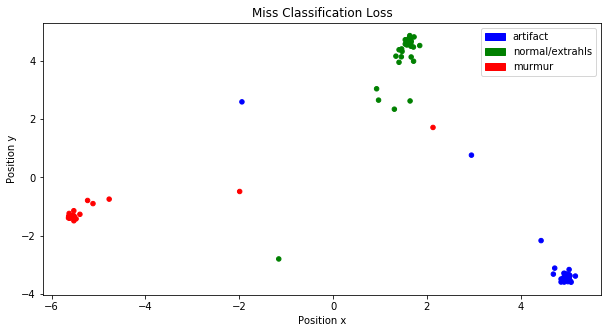

In [106]:
xlist=[]
ylist=[]
for (x,y) in X_lda_train:
    xlist.append(x)
    ylist.append(y)
plt.figure();
dfplot=pd.DataFrame(columns=["Position x", "Position y", "Label"])
dfplot["Position x"] = xlist
dfplot["Position y"] = ylist
dfplot["Label"] = y_train
colors = {0:'red', 1:'blue', 2:'green'}
print(y_train)
dfplot.plot(kind='scatter',x='Position x',y='Position y',
            title="Miss Classification Loss",figsize=(10,5),
            c=dfplot['Label'].apply(lambda x: colors[x]))

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

art = mpatches.Patch(color='blue', label='artifact')
nor = mpatches.Patch(color='green', label='normal/extrahls')
mur = mpatches.Patch(color='red', label='murmur')
plt.legend(handles=[art,nor,mur], loc=1)
plt.show()


# 2 O

In [108]:
std = StandardScaler(with_mean=True, with_std=True)
print("Dimensiones X_train: (", X_lda_train.shape[0], ",", X_lda_train.shape[1], ")")
std.fit(X_lda_train)
X_lda_train = std.transform(X_lda_train)
X_lda_test = std.transform(X_lda_test)

Dimensiones X_train: ( 132 , 2 )


Loss mínimo de: 0.25 con C = 1


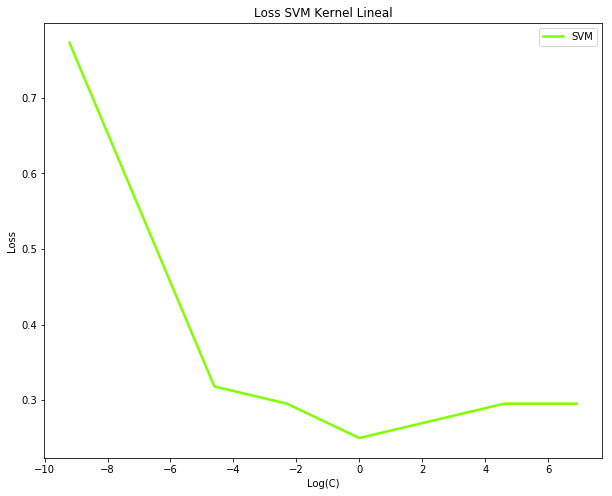

In [109]:
lossSVM = []
for param in parameters:
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X_lda_train,y_train)
    y_hat = model.predict(X_lda_test)
    #y_error = mse(y_test, y_hat)
    loss = (1-accuracy_score(y_test, y_hat))
    lossSVM.append(loss)

minSVM = min(lossSVM)
CSVM = parameters[lossSVM.index(minSVM)]
print("Loss mínimo de:", minSVM, "con C =", CSVM)
    
plt.figure(figsize=(10, 8))
plt.xlabel("Log(C)")
plt.ylabel("Loss")
plt.title("Loss SVM Kernel Lineal")
plt.plot(np.log(parameters), lossSVM, lw=2.5, color=(0.5,1,0), label='SVM')
plt.legend()
plt.show()

Los datos tratados con LDA, muestran resultados favorables respecto a la misma dimensionalidad realizada con PCA. Esto en el caso de SVM.

# 3 A

In [177]:
import nltk
from ftfy import fix_encoding
df = pd.read_csv('./emotionanalysis/text_emotion.csv',header=0)
df.head(5)

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [178]:
df.shape

(40000, 4)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


El dataset consiste en 40000 registros de tweets, con su ID, emoción, autor y contenido.
Se trabajará usando el contenido del tweet para clasificarlo segun su emoción.

A continuación se muestran las 13 clases, correspondientes a las distintas emociones de los tweets, junto a su frecuencia.

In [180]:
df.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

Se eliminan las columnas que no se usarán.

In [181]:
df.drop(['author','tweet_id'],axis=1,inplace=True)

# 3 B

In [182]:
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
print (df_train.shape)
print (df_test.shape)

(31963, 2)
(8037, 2)


# 3 C

Para el pre-procesamiento se eliminan las palabras de largo menor a 3 y se pasan todas a minúsculas.
Se probó eliminando las palabras que contienen números, que consisten sólamente en números y las menciones a usuarios (@username), pero empeoraron los resultados.

In [183]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)
def preProcesamiento(palabra):
    if(len(palabra)<3):
        return ""
    #elif(hasNumbers(palabra)):
    #    return ""
    #elif(palabra[0]=="@"):
    #    return ""
    else:
        return palabra.lower()
df.content=df.content.apply(fix_encoding)

# 3 D

In [184]:
#Se crea un segundo dataframe para items posteriores
df2=df.copy()
df2["sentiment"] = df2["sentiment"].astype('category')
cat_columns = df2.select_dtypes(['category']).columns
df2[cat_columns] = df2[cat_columns].apply(lambda x: x.cat.codes)

In [185]:
def reduccionBinaria(sentiment):
    goodSentiments=['enthusiasm','love','fun','happiness','relief']
    badSentiments=['empty','sadness','worry','hate','anger']
    neutralSentiments=['neutral','surprise',"boredom"]
    if sentiment in goodSentiments:
        return 1
    elif sentiment in badSentiments:
        return -1
    else:
        return 0
#Se reducen las emociones positivas a 1, las negativas a -1 y las neutras a 0
df.sentiment=df.sentiment.apply(reduccionBinaria)


In [186]:
#Se remueven las emociones neutras y contenido vacio, ya que no aportan información
df=df[df.sentiment!=0]
df=df[df.content.map(len) > 0]
df.head(5)

,sentiment,content
0,-1,@tiffanylue i know i was listenin to bad habi...
1,-1,Layin n bed with a headache ughhhh...waitin o...
2,-1,Funeral ceremony...gloomy friday...
3,1,wants to hang out with friends SOON!
5,-1,Re-pinging @ghostridah14: why didn't you go to...


# 3 E

Se crea el vocabulario a partir de todas las palabras del dataset

In [187]:
vocabulary=[]
tokenizer = RegexpTokenizer(r'\w+')
for lista in df.content.apply(tokenizer.tokenize):
    for palabra in lista:
         vocabulary.append(preProcesamiento(palabra))
vocabulary=np.unique(vocabulary)


Se crea un conjunto de entrenamiento(70%) y de prueba(30%) de forma aleatoria.
Se crea otro conjunto con PCA para ser usado en modelos muy complejos de computar.

In [181]:
x=df.content
y=df.sentiment
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.3, random_state=44)
vectorizer = TfidfVectorizer(vocabulary=vocabulary,stop_words=stopwords.words('english'),
                             lowercase=True,preprocessor=preProcesamiento)
xtrain_vector=vectorizer.fit_transform(xtrain)
xtest_vector=vectorizer.transform(xtest)
xtrain_array=xtrain_vector.toarray()
xtest_array=xtest_vector.toarray()


from sklearn.decomposition import PCA
d=10
pca_model = PCA(n_components=d)
pca_model.fit(xtrain_array)
pca_xtrain = pca_model.transform(xtrain_array)
pca_xtest = pca_model.transform(xtest_array)



Se usa una muestra de 20% del dataset para ser usada en modelos muy complejos de computar.

In [182]:
dfsample=df.sample(frac=0.2,random_state=44)
vocabulary2=[]

tokenizer = RegexpTokenizer(r'\w+')
for lista in dfsample.content.apply(tokenizer.tokenize):
    for palabra in lista:
         vocabulary2.append(preProcesamiento(palabra))
vocabulary2=np.unique(vocabulary2)

x2=dfsample.content
ySample=dfsample.sentiment
xtrain2,xtest2,ytrainSample,ytestSample = train_test_split(x2, ySample, test_size=0.3, 
                                                           random_state=44)
vectorizer2 = TfidfVectorizer(vocabulary=vocabulary2,stop_words=stopwords.words('english'),
                              lowercase=True,preprocessor=preProcesamiento)
xtrain_vector2=vectorizer2.fit_transform(xtrain2)
xtest_vector2=vectorizer2.transform(xtest2)
xtrainSample=xtrain_vector2.toarray()
xtestSample=xtest_vector2.toarray()

# 3 F

In [192]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
models=[]
pcaModels=[]
errors=[]
names=[]

In [193]:
model= SVM()
model.set_params(kernel='linear')
model.fit(pca_xtrain,ytrain)
pcaModels.append(model)
yPredictSVM=model.predict(pca_xtest)

error=1-accuracy_score(ytest, yPredictSVM)
print("Miss Classification Loss SVM PCA: %f"%(error))
errors.append(error)
names.append("SVM+PCA")

Miss Classification Loss SVM PCA: 0.388665


In [194]:
model=LR()
model.set_params()
model.fit(xtrain_array,ytrain)
models.append(model)
yPredictLR=model.predict(xtest_array)

error=1-accuracy_score(ytest, yPredictLR)
print("Miss Classification Loss LR: %f"%(error))
errors.append(error)
names.append("LR")


model=LR()
model.set_params()
model.fit(pca_xtrain,ytrain)
pcaModels.append(model)
yPredictLR=model.predict(pca_xtest)

error=1-accuracy_score(ytest, yPredictLR)
print("Miss Classification Loss LR PCA: %f"%(error))
errors.append(error)
names.append("LR+PCA")



Miss Classification Loss LR: 0.248764
Miss Classification Loss LR PCA: 0.379239


In [195]:
model=GaussianNB()
model.set_params()
model.fit(xtrain_array,ytrain)
models.append(model)
yPredictGNB=model.predict(xtest_array)

error=1-accuracy_score(ytest, yPredictGNB)
print("Miss Classification Loss GNB: %f"%(error))
errors.append(error)
names.append("GNB")

model=GaussianNB()
model.set_params()
model.fit(pca_xtrain,ytrain)
pcaModels.append(model)
yPredictGNB=model.predict(pca_xtest)

error=1-accuracy_score(ytest, yPredictGNB)
print("Miss Classification Loss GNB PCA: %f"%(error))
errors.append(error)
names.append("GNB+PCA")

Miss Classification Loss GNB: 0.476032
Miss Classification Loss GNB PCA: 0.403840


In [196]:
model=MultinomialNB()
model.set_params()
model.fit(xtrain_array,ytrain)
models.append(model)
yPredictMNB=model.predict(xtest_array)

error=1-accuracy_score(ytest, yPredictMNB)
print("Miss Classification Loss MNB: %f"%(error))
errors.append(error)
names.append("MNB")

Miss Classification Loss MNB: 0.274054


In [197]:
model=BernoulliNB()
model.set_params()
model.fit(xtrain_array,ytrain)
models.append(model)
yPredictBNB=model.predict(xtest_array)

error=1-accuracy_score(ytest, yPredictBNB)
print("Miss Classification Loss BNB: %f"%(error))
errors.append(error)
names.append("BNB")

Miss Classification Loss BNB: 0.265663


In [198]:
model=tree.DecisionTreeClassifier(max_depth=10)
model.set_params()
model.fit(pca_xtrain,ytrain)
pcaModels.append(model)
yPredictTree=model.predict(pca_xtest)

error=1-accuracy_score(ytest, yPredictTree)
print("Miss Classification Loss Tree PCA: %f"%(error))
errors.append(error)
names.append("Tree+PCA")

model=tree.DecisionTreeClassifier(max_depth=10)
model.set_params()
model.fit(xtrainSample,ytrainSample)
pcaModels.append(model)
yPredictTree=model.predict(xtestSample)

error=1-accuracy_score(ytestSample, yPredictTree)
print("Miss Classification Loss Tree 20%% Sample: %f"%(error))
errors.append(error)
names.append("Tree Sample")

Miss Classification Loss Tree PCA: 0.356823
Miss Classification Loss Tree 20% Sample: 0.367241


In [199]:
model=LDA()
model.set_params()
model.fit(pca_xtrain,ytrain)
pcaModels.append(model)
yPredictLDA=model.predict(pca_xtest)

error=1-accuracy_score(ytest, yPredictLDA)
print("Miss Classification Loss LDA PCA: %f"%(error))
errors.append(error)
names.append("LDA+PCA")

Miss Classification Loss LDA PCA: 0.380848


In [200]:
model=QDA()
model.set_params()
model.fit(pca_xtrain,ytrain)
pcaModels.append(model)
yPredictQDA=model.predict(pca_xtest)

error=1-accuracy_score(ytest, yPredictQDA)
print("Miss Classification Loss QDA PCA: %f"%(error))
errors.append(error)
names.append("QDA+PCA")

Miss Classification Loss QDA PCA: 0.386711


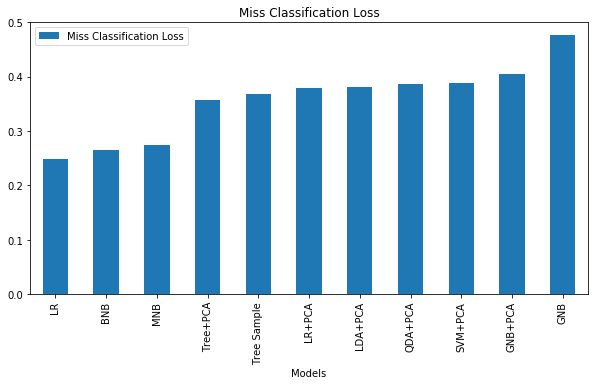

In [279]:
plt.figure();
dfplot=pd.DataFrame(columns=["Models","Miss Classification Loss"])
dfplot["Models"]=names
dfplot["Miss Classification Loss"]=errors
dfplot.sort_values(by='Miss Classification Loss',inplace=True)
dfplot.plot(kind='bar',x='Models',y='Miss Classification Loss',title="Miss Classification Loss",figsize=(10,5))

# 3 G

In [37]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print ("Training Accuracy: %f"%(acc_tr))
    print ("Test Accuracy: %f"%(acc_test))
    print ("Detailed Analysis Testing Results ...")
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))
modelsNames=['Logistic Regression','Gaussian Naive Bayes','Multinomial Naive Bayes','Bernoulli Naive Bayes']
pcaModelsNames=['Support Vector Machine PCA','Logistic Regression PCA','Gaussian Naive Bayes PCA','Decision Tree Classifier PCA']
for (item,name) in zip(models,modelsNames):
    print(name)
    score_the_model(item,xtrain_array,ytrain,xtest_array,ytest)
for (item,name) in zip(pcaModels,pcaModelsNames):
    print(name)
    score_the_model(item,pca_xtrain,ytrain,pca_xtest,ytest)

Logistic Regression
Training Accuracy: 0.861408
Test Accuracy: 0.747183
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.84      0.78      4701
          -       0.77      0.63      0.70      3998

avg / total       0.75      0.75      0.74      8699

Gaussian Naive Bayes
Training Accuracy: 0.883727
Test Accuracy: 0.534836
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.65      0.30      0.41      4701
          -       0.50      0.81      0.62      3998

avg / total       0.58      0.53      0.50      8699

Multinomial Naive Bayes
Training Accuracy: 0.883973
Test Accuracy: 0.719706
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.69      0.88      0.77      4701
          -       0.79      0.53      0.64      3998

avg / total       0.73      0.72      0.71      8699

Bernoulli Naive Baye

Precision es la razón tp/(tp+fp) donde tp es la cantidad de verdaderos positivos y fp la cantidad de falsos positivos. Se puede interpretar como la habilidad del clasificador para no clasificar como positivo un dato que es negativo

Recall es la razón tp/(tp+fn) donde tp es la cantidad de verdaderos positivos y fn la cantidad de falsos negativos. Se puede interpretar como la habilidad de clasificador para encontrar todos los datos positivos.

f1-score es un promedio ponderado de precision y recall calculado como:

$$2 \cdot (precision \cdot recall) / (precision + recall)$$

Support es la representatividad de una clase. En este caso se muestra la cantidad de datos pertenecientes a esa clase.


# 3 H (OPCIONAL! :D!)

# 3 I

In [188]:
df2=df2.sample(frac=0.5,random_state=44)
vocabulary=[]
tokenizer = RegexpTokenizer(r'\w+')
for lista in df2.content.apply(tokenizer.tokenize):
    for palabra in lista:
         vocabulary.append(preProcesamiento(palabra))
vocabulary=np.unique(vocabulary)
x=df2.content
y=df2.sentiment
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.3, random_state=44)
vectorizer = TfidfVectorizer(vocabulary=vocabulary,stop_words=stopwords.words('english'),
                             lowercase=True,preprocessor=preProcesamiento)
xtrain_vector=vectorizer.fit_transform(xtrain)
xtest_vector=vectorizer.transform(xtest)
xtrain_array=xtrain_vector.toarray()
xtest_array=xtest_vector.toarray()


In [189]:
d=10
from sklearn.decomposition import PCA
pca_model = PCA(n_components=d)
pca_model.fit(xtrain_array)
pca_xtrain = pca_model.transform(xtrain_array)
pca_xtest = pca_model.transform(xtest_array)

# 3 J

In [190]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
errors=[]
names=[]

In [191]:
model=BernoulliNB()
model.set_params()
model.fit(xtrain_array,ytrain)
yPredictBNB=model.predict(xtest_array)

error=1-accuracy_score(ytest, yPredictBNB)
print("Miss Classification Loss BNB: %f"%(error))
errors.append(error)
names.append("BNB")

Miss Classification Loss BNB: 0.716833


In [192]:
model=LR()
model.set_params()
model.fit(xtrain_array,ytrain)
yPredictLR=model.predict(xtest_array)

error=1-accuracy_score(ytest, yPredictLR)
print("Miss Classification Loss LR: %f"%(error))
errors.append(error)
names.append("LR")


model=LR()
model.set_params()
model.fit(pca_xtrain,ytrain)
yPredictLR=model.predict(pca_xtest)

error=1-accuracy_score(ytest, yPredictLR)
print("Miss Classification Loss LR PCA: %f"%(error))
errors.append(error)
names.append("LR+PCA")

Miss Classification Loss LR: 0.664000
Miss Classification Loss LR PCA: 0.729500


In [193]:
model= SVM()
model.set_params(kernel='linear')
model.fit(pca_xtrain,ytrain)
yPredictSVM=model.predict(pca_xtest)

error=1-accuracy_score(ytest, yPredictSVM)
print("Miss Classification Loss SVM PCA: %f"%(error))
errors.append(error)
names.append("SVM+PCA")

Miss Classification Loss SVM PCA: 0.754167


In [194]:
model=GaussianNB()
model.set_params()
model.fit(xtrain_array,ytrain)
yPredictGNB=model.predict(xtest_array)

error=1-accuracy_score(ytest, yPredictGNB)
print("Miss Classification Loss GNB: %f"%(error))
errors.append(error)
names.append("GNB")

model=GaussianNB()
model.set_params()
model.fit(pca_xtrain,ytrain)
yPredictGNB=model.predict(pca_xtest)

error=1-accuracy_score(ytest, yPredictGNB)
print("Miss Classification Loss GNB PCA: %f"%(error))
errors.append(error)
names.append("GNB+PCA")

Miss Classification Loss GNB: 0.870000
Miss Classification Loss GNB PCA: 0.777333


In [195]:
model=tree.DecisionTreeClassifier(max_depth=10)
model.set_params()
model.fit(pca_xtrain,ytrain)
yPredictTree=model.predict(pca_xtest)

error=1-accuracy_score(ytest, yPredictTree)
print("Miss Classification Loss Tree PCA: %f"%(error))
errors.append(error)
names.append("Tree+PCA")

Miss Classification Loss Tree PCA: 0.748333


In [196]:
model=LDA()
model.set_params()
model.fit(pca_xtrain,ytrain)
yPredictLDA=model.predict(pca_xtest)

error=1-accuracy_score(ytest, yPredictLDA)
print("Miss Classification Loss LDA PCA: %f"%(error))
errors.append(error)
names.append("LDA+PCA")

Miss Classification Loss LDA PCA: 0.736333


In [198]:
model=QDA()
model.set_params()
model.fit(pca_xtrain,ytrain)
yPredictQDA=model.predict(pca_xtest)

error=1-accuracy_score(ytest, yPredictQDA)
print("Miss Classification Loss QDA PCA: %f"%(error))
errors.append(error)
names.append("QDA+PCA")

Miss Classification Loss QDA PCA: 0.893167


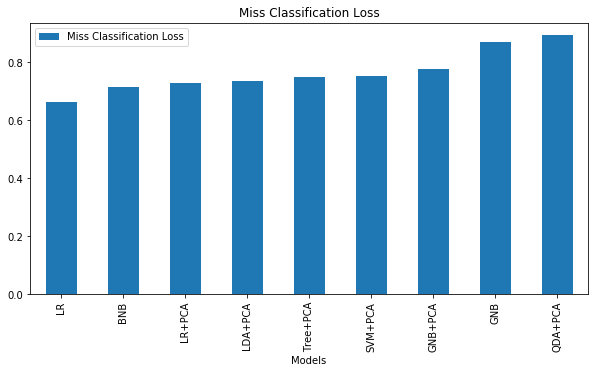

In [199]:
plt.figure();
dfplot=pd.DataFrame(columns=["Models","Miss Classification Loss"])
dfplot["Models"]=names
dfplot["Miss Classification Loss"]=errors
dfplot.sort_values(by='Miss Classification Loss',inplace=True)
dfplot.plot(kind='bar',x='Models',y='Miss Classification Loss',title="Miss Classification Loss",figsize=(10,5))

# 3 K

In [229]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
errors=[]
names=[]
labels=[]

In [230]:
OneVsRest = OneVsRestClassifier(LR())
OneVsRest.fit(xtrain_array, ytrain)
yPredictOVR=OneVsRest.predict(xtest_array)
error=1-accuracy_score(ytest, yPredictOVR)
print("Miss Classification Loss OVR LR: %f"%(error))
errors.append(error)
names.append('OVR LR')
labels.append('green')

Miss Classification Loss OVR LR: 0.664000


In [231]:
OneVsOne = OneVsOneClassifier(LR())
OneVsOne.fit(xtrain_array, ytrain)
yPredictOVO=OneVsOne.predict(xtest_array)
error=1-accuracy_score(ytest, yPredictOVO)
print("Miss Classification Loss OVO LR: %f"%(error))
errors.append(error)
names.append('OVO LR')
labels.append('red')

Miss Classification Loss OVO LR: 0.669167


In [232]:
OneVsRest = OneVsRestClassifier(BernoulliNB())
OneVsRest.fit(xtrain_array, ytrain)
yPredictOVR=OneVsRest.predict(xtest_array)
error=1-accuracy_score(ytest, yPredictOVR)
print("Miss Classification Loss OVR BNB: %f"%(error))
errors.append(error)
names.append('OVR BNB')
labels.append('green')

Miss Classification Loss OVR BNB: 0.716000


In [233]:
OneVsOne = OneVsOneClassifier(BernoulliNB())
OneVsOne.fit(pca_xtrain, ytrain)
yPredictOVO=OneVsOne.predict(pca_xtest)
error=1-accuracy_score(ytest, yPredictOVO)
print("Miss Classification Loss OVO BNB: %f"%(error))
errors.append(error)
names.append('OVO BNB')
labels.append('red')

Miss Classification Loss OVO BNB: 0.733833


In [234]:
OneVsRest = OneVsRestClassifier(LDA())
OneVsRest.fit(pca_xtrain, ytrain)
yPredictOVR=OneVsRest.predict(pca_xtest)
error=1-accuracy_score(ytest, yPredictOVR)
print("Miss Classification Loss OVR LDA: %f"%(error))
errors.append(error)
names.append('OVR LDA')
labels.append('green')

Miss Classification Loss OVR LDA: 0.734167


In [235]:
OneVsOne = OneVsOneClassifier(LDA())
OneVsOne.fit(pca_xtrain, ytrain)
yPredictOVO=OneVsOne.predict(pca_xtest)
error=1-accuracy_score(ytest, yPredictOVO)
print("Miss Classification Loss OVO LDA: %f"%(error))
errors.append(error)
names.append('OVO LDA')
labels.append('red')

Miss Classification Loss OVO LDA: 0.731333


In [236]:
OneVsRest = OneVsRestClassifier(QDA())
OneVsRest.fit(pca_xtrain, ytrain)
yPredictOVR=OneVsRest.predict(pca_xtest)
error=1-accuracy_score(ytest, yPredictOVR)
print("Miss Classification Loss OVR QDA: %f"%(error))
errors.append(error)
names.append('OVR QDA')
labels.append('green')

Miss Classification Loss OVR QDA: 0.873500


In [237]:
OneVsOne = OneVsOneClassifier(QDA())
OneVsOne.fit(pca_xtrain, ytrain)
yPredictOVO=OneVsOne.predict(pca_xtest)
error=1-accuracy_score(ytest, yPredictOVO)
print("Miss Classification Loss OVO QDA: %f"%(error))
errors.append(error)
names.append('OVO QDA')
labels.append('red')

Miss Classification Loss OVO QDA: 0.893167


# 3 L

In [238]:
ovrLR=LR(multi_class='ovr')
ovrLR.fit(xtrain_array, ytrain)
yPredict=ovrLR.predict(xtest_array)
error=1-accuracy_score(ytest, yPredict)
print("Miss Classification Loss LR OVR: %f"%(error))
errors.append(error)
names.append('LR OVR')
labels.append('blue')

MNLR=LR(multi_class='multinomial',solver='lbfgs')
MNLR.fit(pca_xtrain, ytrain)
yPredict=MNLR.predict(pca_xtest)
error=1-accuracy_score(ytest, yPredict)
print("Miss Classification Loss LR MN PCA: %f"%(error))
errors.append(error)
names.append('LR MN PCA')
labels.append('blue')

Miss Classification Loss LR OVR: 0.664000
Miss Classification Loss LR MN PCA: 0.728667


# 3 M

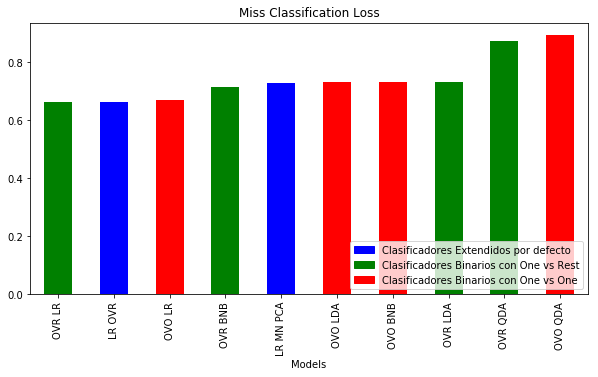

In [260]:

plt.figure();
dfplot=pd.DataFrame(columns=["Models","Miss Classification Loss","Labels"])
dfplot["Models"]=names
dfplot["Miss Classification Loss"]=errors
dfplot["Labels"]=labels

dfplot.sort_values(by='Miss Classification Loss',inplace=True)
dfplot.plot(kind='bar',x='Models',y='Miss Classification Loss',
            title="Miss Classification Loss",
            figsize=(10,5),
            color=[dfplot["Labels"]])
art = mpatches.Patch(color='blue', label='Clasificadores Extendidos por defecto')
nor = mpatches.Patch(color='green', label='Clasificadores Binarios con One vs Rest')
asdf = mpatches.Patch(color='red', label='Clasificadores Binarios con One vs One')

plt.legend(handles=[art,nor,asdf], loc=4)
plt.show()

No se observa mucha diferencia entre los distintos tipos de clasificadores. LR de cualquier tipo genera los mejores resultados.